In [31]:
import pandas as pd

# Replace with your actual file path
csv_path = "/Users/diya/SmartRoom/room_data/Room1.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Print basic info
print("📊 Dataset Summary")
print(f"File: {csv_path}")
print(f"Number of data points: {len(df)}")
print(f"Columns: {list(df.columns)}\n")

# For each numeric column, print min, max, and range
numeric_cols = df.select_dtypes(include='number').columns

print("Column Stats:")
for col in numeric_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    col_range = col_max - col_min
    print(f"{col}:")
    print(f"  Min: {col_min}")
    print(f"  Max: {col_max}")
    print(f"  Range: {col_range}\n")


📊 Dataset Summary
File: /Users/diya/SmartRoom/room_data/Room1.csv
Number of data points: 161366
Columns: ['time', 'relative_humidity', 'temperature', 'room_id']

Column Stats:
time:
  Min: 1572584409189
  Max: 1575262798344
  Range: 2678389155

relative_humidity:
  Min: 41.0
  Max: 79.9
  Range: 38.900000000000006

temperature:
  Min: 17.6
  Max: 26.7
  Range: 9.099999999999998



In [30]:
import pandas as pd

csv_path = "/Users/diya/SmartRoom/dataset_4/dxyvxk6h96-2/dxyvxk6h96-2/November_cleaned/2e08daa8654c.csv"
df = pd.read_csv(csv_path)

print(f"📊 Summary for: {csv_path}")
print(f"Number of data points: {len(df)}")
print(f"Columns: {list(df.columns)}\n")

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    print(f"--- {col} ---")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Variance: {df[col].var():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Range: {(df[col].max() - df[col].min()):.2f}")
    print()


📊 Summary for: /Users/diya/SmartRoom/dataset_4/dxyvxk6h96-2/dxyvxk6h96-2/November_cleaned/2e08daa8654c.csv
Number of data points: 67127
Columns: ['time', 'relative_humidity', 'temperature']

--- time ---
  Mean: 1573941503812.56
  Median: 1573936537420.00
  Std Dev: 776885066.46
  Variance: 603550406493225984.00
  Min: 1572584458367.00
  Max: 1575262787712.00
  Range: 2678329345.00

--- relative_humidity ---
  Mean: 64.50
  Median: 63.70
  Std Dev: 6.01
  Variance: 36.14
  Min: 44.60
  Max: 82.70
  Range: 38.10

--- temperature ---
  Mean: 19.15
  Median: 19.00
  Std Dev: 1.04
  Variance: 1.07
  Min: 17.60
  Max: 26.50
  Range: 8.90



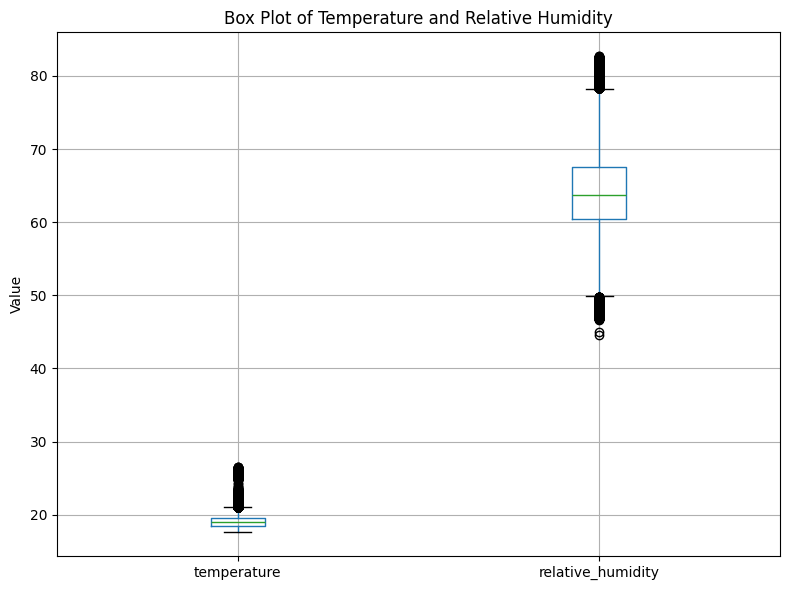

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file (replace with actual file path if different)
csv_path = "/Users/diya/SmartRoom/dataset_4/dxyvxk6h96-2/dxyvxk6h96-2/November_cleaned/2e08daa8654c.csv"
df = pd.read_csv(csv_path)

# Select relevant numeric columns
columns_to_plot = ['temperature', 'relative_humidity']
# Check if timestamp should be excluded (likely non-numeric)
if 'timestamp' in df.columns:
    df = df.drop(columns=['timestamp'])

# Plot box plots
plt.figure(figsize=(8, 6))
df[columns_to_plot].boxplot()
plt.title("Box Plot of Temperature and Relative Humidity")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


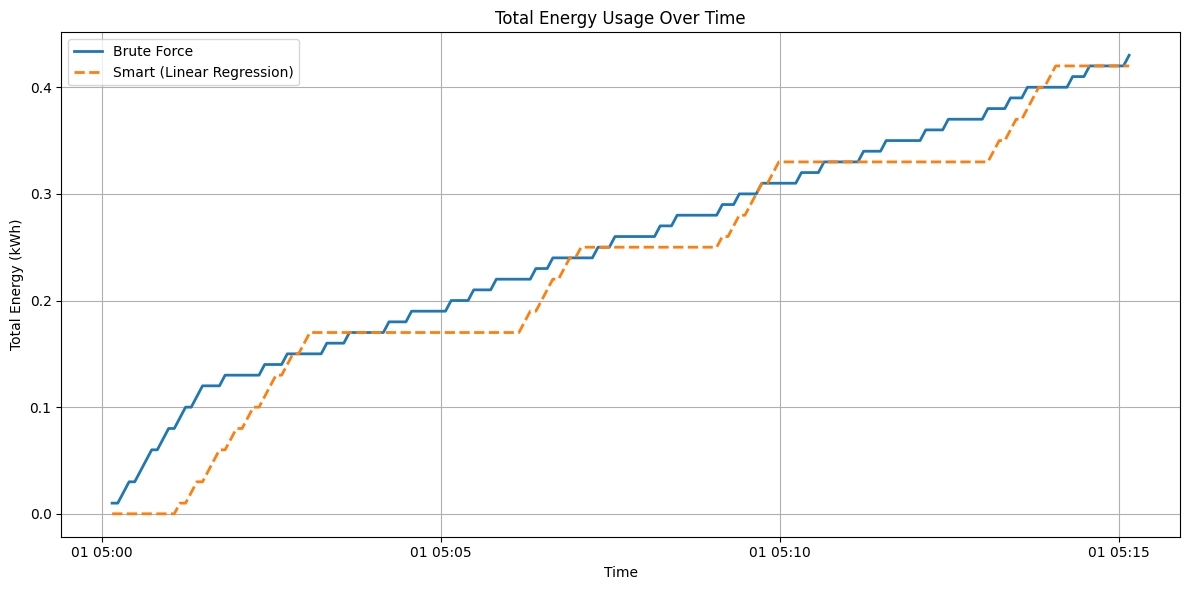

✅ Total energy plot saved to: /Users/diya/SmartRoom/room1_output_logs/total_energy_comparison.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load data
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"
#boosting_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_boosting.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)
#boost_df = pd.read_csv(boosting_csv)

# Convert 'time' to datetime
brute_df['time'] = pd.to_datetime(brute_df['time'])
smart_df['time'] = pd.to_datetime(smart_df['time'])
#boost_df['time'] = pd.to_datetime(boost_df['time'])

# Plot total energy usage
plt.figure(figsize=(12, 6))
plt.plot(brute_df['time'], brute_df['total_energy'], label='Brute Force', linewidth=2)
plt.plot(smart_df['time'], smart_df['total_energy'], label='Smart (Linear Regression)', linewidth=2, linestyle='--')
#plt.plot(boost_df['time'], boost_df['total_energy'], label='Boosting (Linear Regression)', linewidth=3, linestyle='--')

plt.title("Total Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
plot_path = os.path.join(os.path.dirname(brute_csv), "total_energy_comparison.png")
plt.savefig(plot_path)
plt.show()
print(f"✅ Total energy plot saved to: {plot_path}")


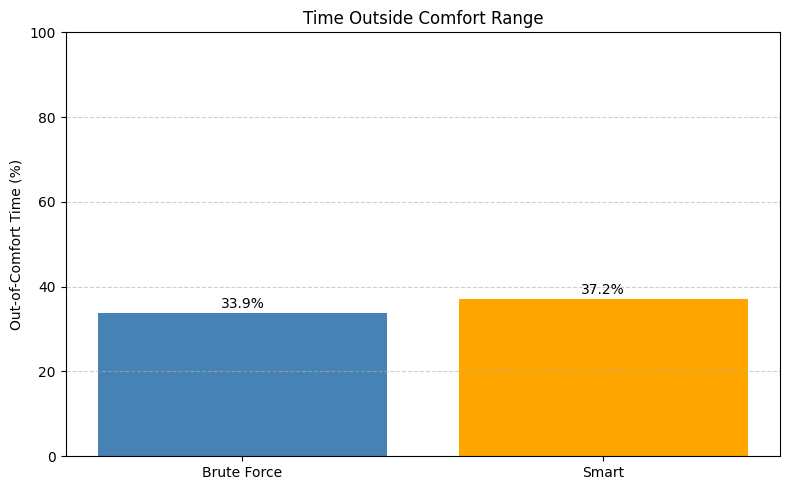

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output/output_csv_smart.csv"
passive_csv = "/Users/diya/SmartRoom/room1_output/output_csv_passive.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)
passive_df = pd.read_csv(passive_csv)

# Convert room_temp to numeric
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")
smart_df["room_temp"] = pd.to_numeric(smart_df["room_temp"], errors="coerce")
passive_df["room_temp"] = pd.to_numeric(passive_df["room_temp"], errors="coerce")

# Define comfort range
low, high = 20.0, 22.0

# Count out-of-range steps
def count_out_of_range(df):
    return ((df["room_temp"] < low) | (df["room_temp"] > high)).sum()

brute_violations = count_out_of_range(brute_df)
smart_violations = count_out_of_range(smart_df)
passive_violations = count_out_of_range(passive_df)


# Total steps
brute_total = brute_df["room_temp"].notna().sum()
smart_total = smart_df["room_temp"].notna().sum()
passive_total = passive_df["room_temp"].notna().sum()

# Percent
brute_percent = 100 * brute_violations / brute_total
smart_percent = 100 * smart_violations / smart_total
passive_percent = 100 * passive_violations / passive_total

# Plot
methods = ["Brute Force", "Smart", "Passive"]
values = [brute_percent, smart_percent, passive_percent]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=["steelblue", "orange", "green"])
plt.ylabel("Out-of-Comfort Time (%)")
plt.title("Time Outside Comfort Range")
plt.ylim(0, 100)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


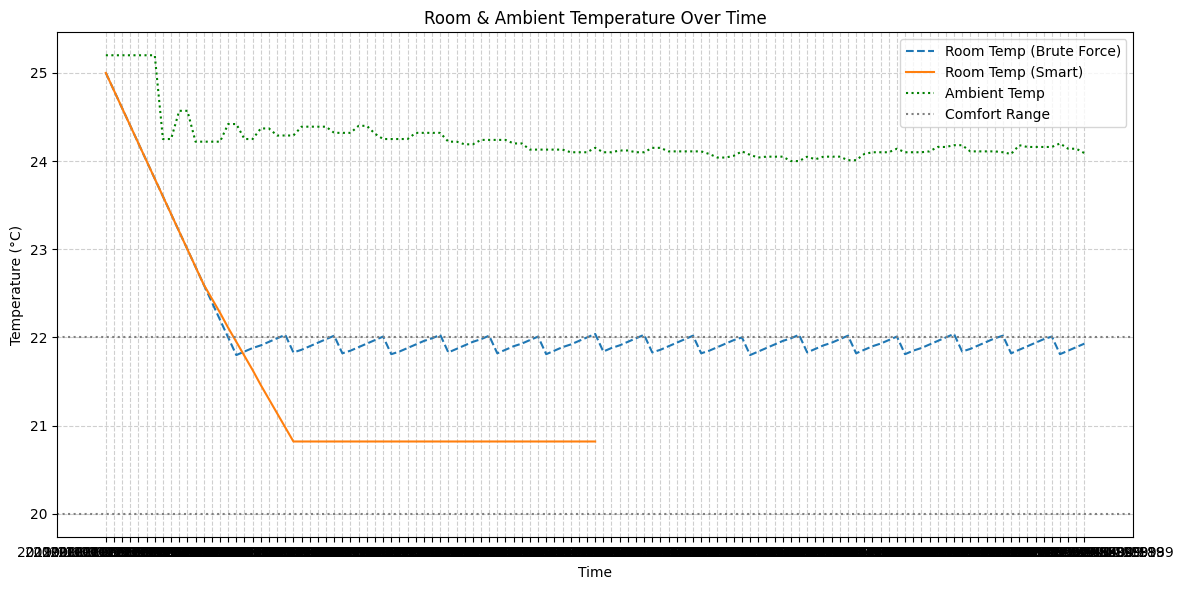

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Ensure numeric types
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")
smart_df["room_temp"] = pd.to_numeric(smart_df["room_temp"], errors="coerce")
brute_df["ambient_temp"] = pd.to_numeric(brute_df["ambient_temp"], errors="coerce")

# Define comfort range
low, high = 20.0, 22.0

# Plot
plt.figure(figsize=(12, 6))

# Room temperature lines
plt.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp (Brute Force)", linestyle='--')
plt.plot(smart_df["time"], smart_df["room_temp"], label="Room Temp (Smart)", linestyle='-')

# Ambient temperature
plt.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

# Comfort range lines
plt.axhline(low, color='gray', linestyle=':', label='Comfort Range')
plt.axhline(high, color='gray', linestyle=':')

# Labels and layout
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Room & Ambient Temperature Over Time")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


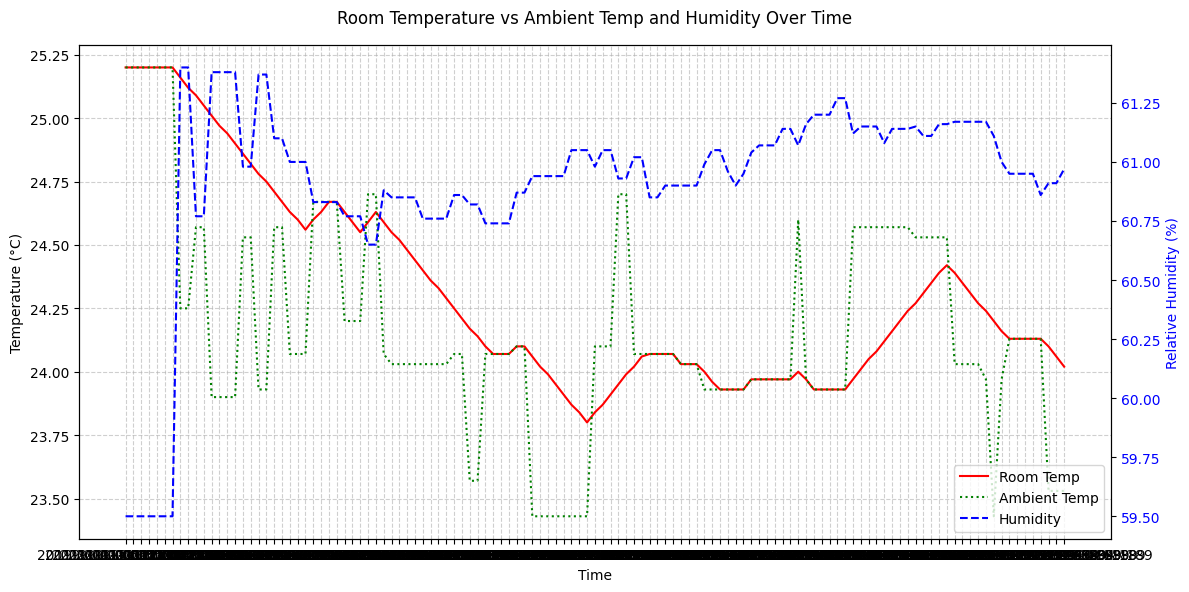

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

passive_csv = "/Users/diya/SmartRoom/room3_output_logs/output_csv_passive.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


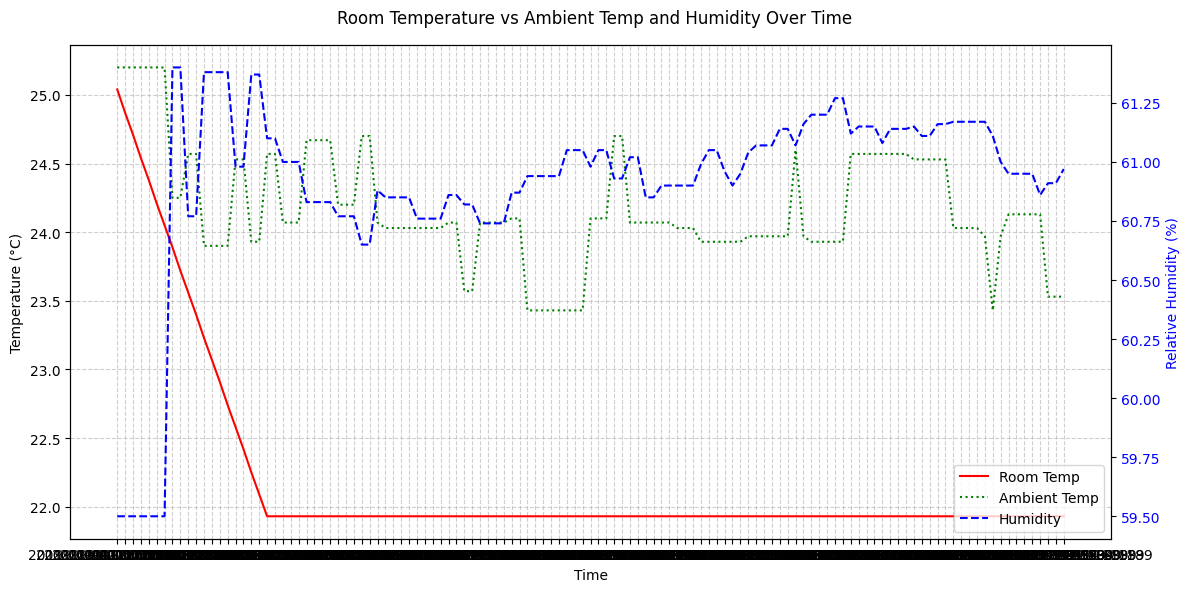

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room2_output_logs/output_csv_brute.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


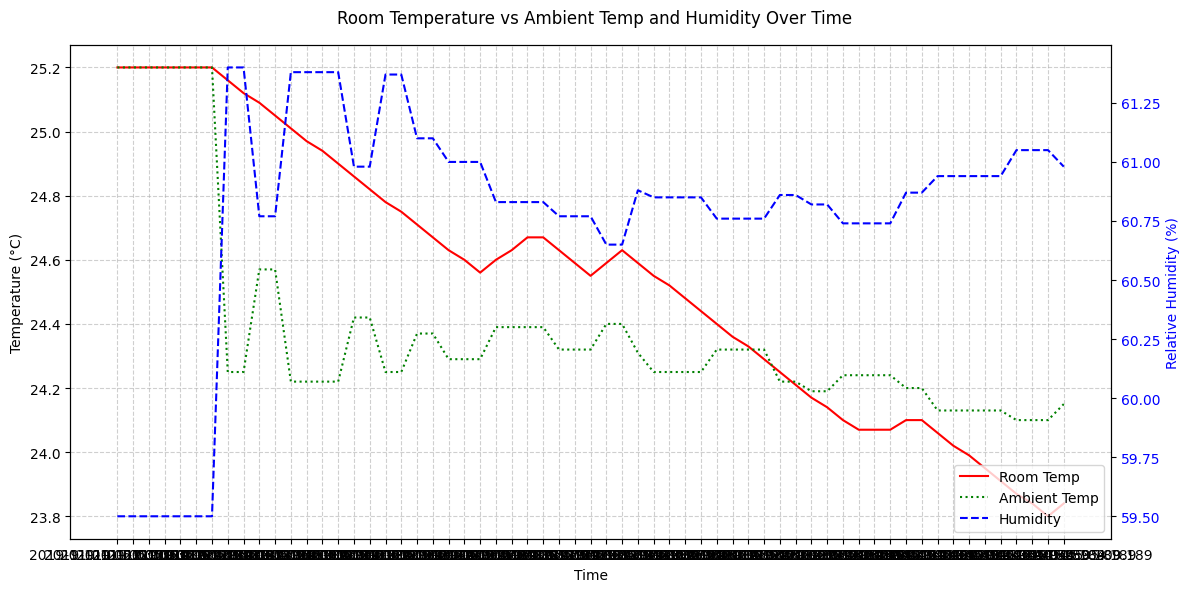

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_df = pd.read_csv(brute_csv)
brute_df["room_temp"] = pd.to_numeric(brute_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(brute_df["time"], brute_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and legends
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Baseline temperature of the room 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

base_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
base_df = pd.read_csv(base_csv)
brute_df = pd.read_csv(brute_csv)

# Parse timestamp (already in readable format)
base_df["time"] = pd.to_datetime(base_df["time"])
brute_df["time"] = pd.to_datetime(brute_df["time"])
base_df["room_temp"] = pd.to_numeric(base_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot room and ambient temps
ax1.plot(brute_df["time"], base_df["room_temp"], label="Room Temp(base)", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp(brute)", linestyle='-', color="orange")
ax1.plot(brute_df["time"], base_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format x-axis as minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # show minute part of timestamp
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
ax2.plot(base_df["time"], base_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legends and grid
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x123a397f0>.

Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).


Error in callback <function _draw_all_if_interactive at 0x1224015e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ..., 126.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 190081 ticks ([-6.0, ...

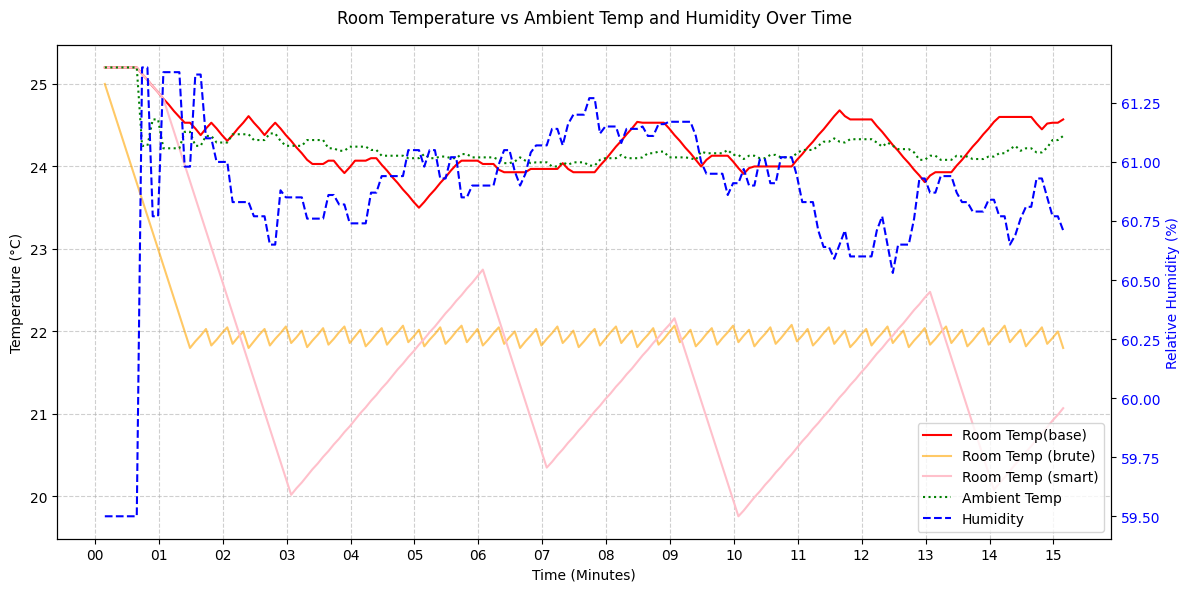

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

base_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_passive.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output_logs/output_csv_smart.csv"

base_df = pd.read_csv(base_csv)
brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Parse timestamp (already in readable format)
base_df["time"] = pd.to_datetime(base_df["time"])
brute_df["time"] = pd.to_datetime(brute_df["time"])
smart_df["time"] = pd.to_datetime(smart_df["time"])
base_df["room_temp"] = pd.to_numeric(base_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot room and ambient temps
ax1.plot(brute_df["time"], base_df["room_temp"], label="Room Temp(base)", linestyle='-', color="red")
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Room Temp (brute)", linestyle='-', color="orange", alpha=0.6)
ax1.plot(brute_df["time"], smart_df["room_temp"], label="Room Temp (smart)", linestyle='-', color="pink")
ax1.plot(brute_df["time"], base_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format x-axis as minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # show minute part of timestamp
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
ax2.plot(base_df["time"], base_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legends and grid
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


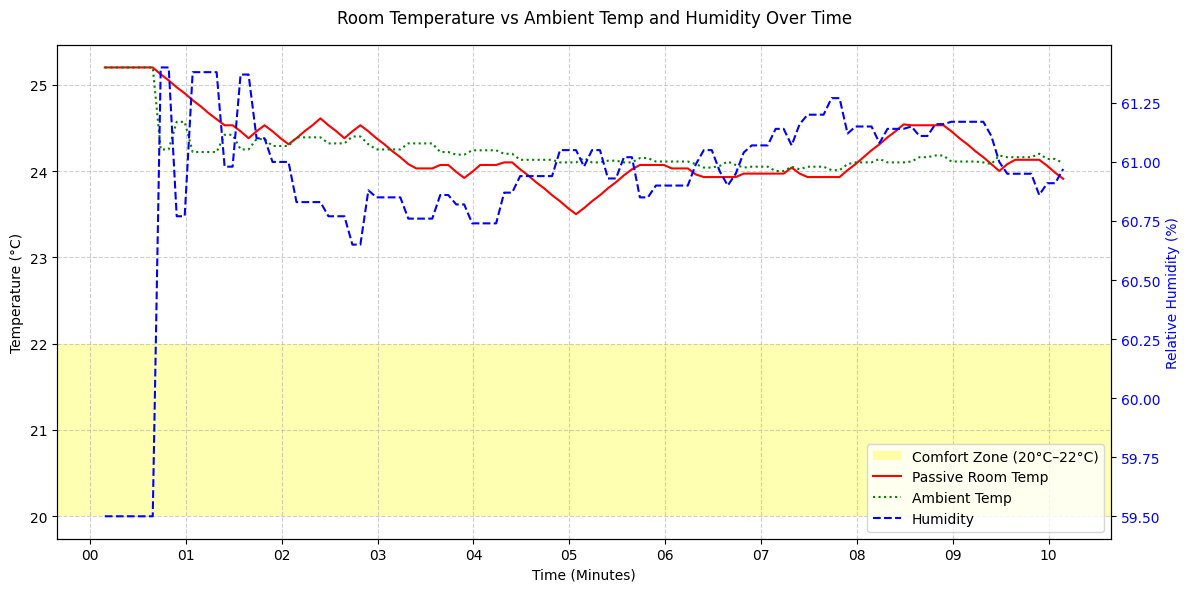

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

passive_csv = "/Users/diya/SmartRoom/room1_output//output_csv_passive.csv"


passive_df = pd.read_csv(passive_csv)
brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)

# Parse timestamp (already in readable format)
passive_df["time"] = pd.to_datetime(passive_df["time"])
passive_df["room_temp"] = pd.to_numeric(passive_df["room_temp"], errors="coerce")

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.axhspan(20, 22, facecolor='yellow', alpha=0.3, label="Comfort Zone (20°C–22°C)")


# Plot room and ambient temps
ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='-', color="red")
ax1.plot(passive_df["time"], passive_df["ambient_temp"], label="Ambient Temp", linestyle=':', color='green')

ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Format x-axis as minutes
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # show minute part of timestamp
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
ax2.plot(passive_df["time"], passive_df["humidity"], label="Humidity", linestyle='--', color='blue')
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Legends and grid
fig.suptitle("Room Temperature vs Ambient Temp and Humidity Over Time")
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="lower right")

ax1.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


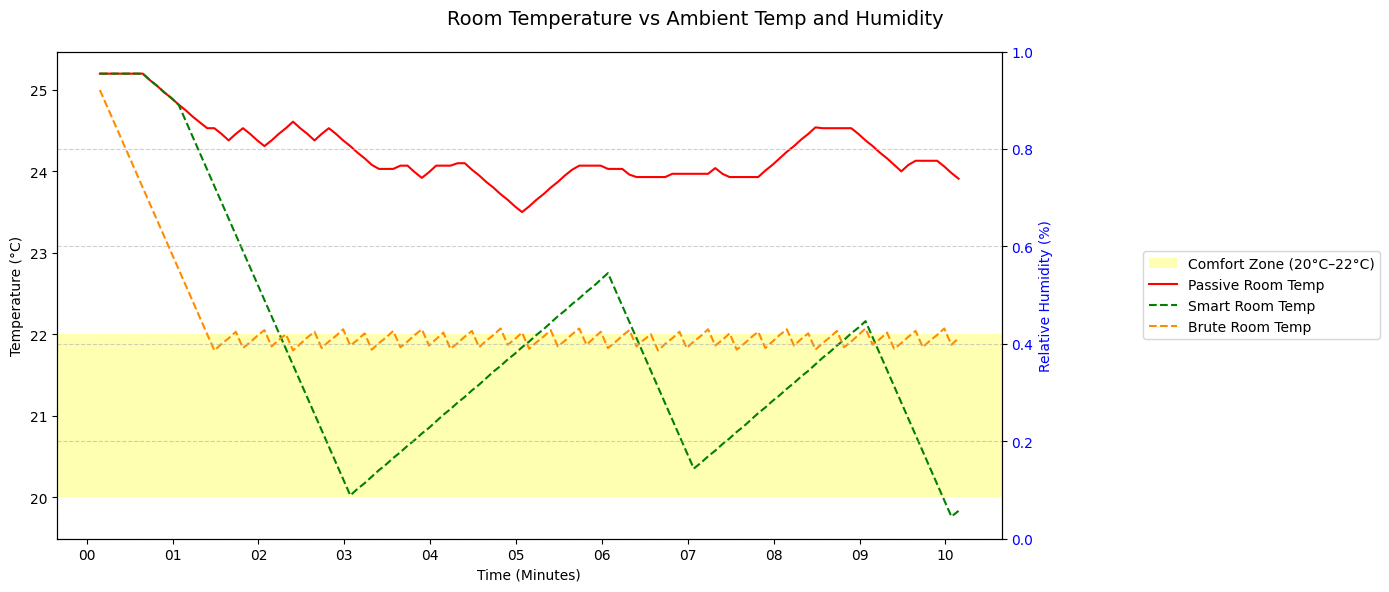

In [23]:
# ROOM 2 TESTING (Different comfort levels)
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data
smart_csv = "/Users/diya/SmartRoom/room1_output/output_csv_smart.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output/output_csv_brute.csv"
passive_csv = "/Users/diya/SmartRoom/room1_output/output_csv_passive.csv"

smart_df = pd.read_csv(smart_csv)
brute_df = pd.read_csv(brute_csv)
passive_df = pd.read_csv(passive_csv)

# Parse timestamps
for df in [smart_df, brute_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])

# Ensure numeric conversion
for df in [smart_df, brute_df, passive_df]:
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")
passive_df["ambient_temp"] = pd.to_numeric(passive_df["ambient_temp"], errors="coerce")
passive_df["humidity"] = pd.to_numeric(passive_df["humidity"], errors="coerce")

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))

# Highlight comfort zone
ax1.axhspan(20, 22, facecolor='yellow', alpha=0.3, label="Comfort Zone (20°C–22°C)")

# Plot temperature lines with bolder lines and clearer colors
ax1.plot(passive_df["time"], passive_df["room_temp"], label="Passive Room Temp", linestyle='-', color="red")
ax1.plot(smart_df["time"], smart_df["room_temp"], label="Smart Room Temp", linestyle='--', color='green')
#ax1.plot(passive_df["time"], passive_df["ambient_temp"], label="Ambient Temp", linestyle='--', color='forestgreen')
ax1.plot(brute_df["time"], brute_df["room_temp"], label="Brute Room Temp", linestyle='--', color='darkorange')

# Axes formatting
ax1.set_xlabel("Time (Minutes)")
ax1.set_ylabel("Temperature (°C)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%M'))
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Humidity on secondary axis
ax2 = ax1.twinx()
#ax2.plot(passive_df["time"], passive_df["humidity"], label="Humidity", linestyle='--', color='royalblue', linewidth=2.0)
ax2.set_ylabel("Relative Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legends and move to the far right
fig.suptitle("Room Temperature vs Ambient Temp and Humidity", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Move legend further right (outside the entire plot)
ax1.legend(lines1 + lines2, labels1 + labels2, loc="center left", bbox_to_anchor=(1.15, 0.5), borderaxespad=0.)

# Adjust layout to prevent clipping
plt.subplots_adjust(right=0.8)  # make space on the right
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



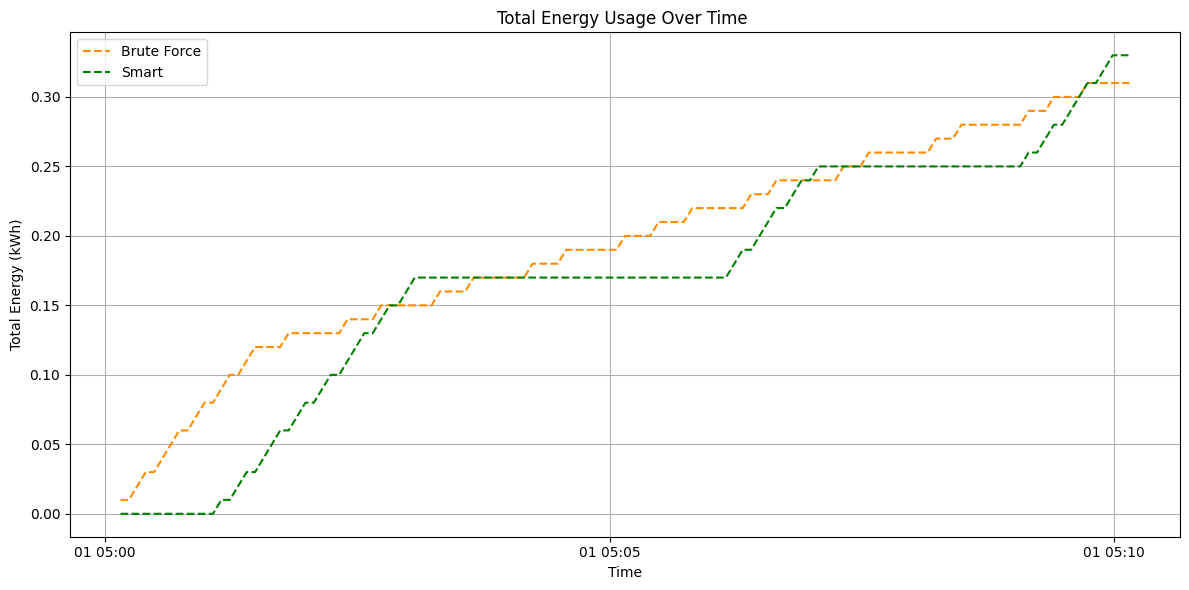

Total energy plot saved to: /Users/diya/SmartRoom/room1_output/total_energy_comparison.png


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load data
smart_csv = "/Users/diya/SmartRoom/room1_output/output_csv_smart.csv"
brute_csv = "/Users/diya/SmartRoom/room1_output/output_csv_brute.csv"

brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)
#boost_df = pd.read_csv(boosting_csv)

# Convert 'time' to datetime
brute_df['time'] = pd.to_datetime(brute_df['time'])
smart_df['time'] = pd.to_datetime(smart_df['time'])
#boost_df['time'] = pd.to_datetime(boost_df['time'])

# Plot total energy usage
plt.figure(figsize=(12, 6))
plt.plot(brute_df['time'], brute_df['total_energy'], label='Brute Force', linestyle='--', color='darkorange')
plt.plot(smart_df['time'], smart_df['total_energy'], label='Smart', linestyle='--', color='green')
#plt.plot(boost_df['time'], boost_df['total_energy'], label='Boosting (Linear Regression)', linewidth=3, linestyle='--')

plt.title("Total Energy Usage Over Time ")
plt.xlabel("Time")
plt.ylabel("Total Energy (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save and show
plot_path = os.path.join(os.path.dirname(brute_csv), "total_energy_comparison.png")
plt.savefig(plot_path)
plt.show()
print(f"Total energy plot saved to: {plot_path}")


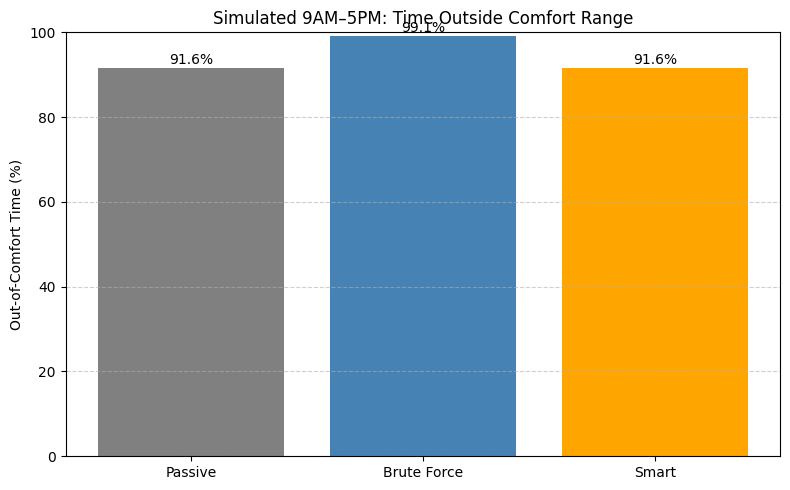

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
brute_csv = "/Users/diya/SmartRoom/room1_output/output_csv_brute.csv"
smart_csv = "/Users/diya/SmartRoom/room1_output/output_csv_smart.csv"
passive_csv = "/Users/diya/SmartRoom/room1_output/output_csv_passive.csv"

# Load CSVs
brute_df = pd.read_csv(brute_csv)
smart_df = pd.read_csv(smart_csv)
passive_df = pd.read_csv(passive_csv)

# Convert to datetime and numeric
for df in [brute_df, smart_df, passive_df]:
    df["time"] = pd.to_datetime(df["time"])
    df["room_temp"] = pd.to_numeric(df["room_temp"], errors="coerce")

# Define comfort range
low, high = 25.0, 27.0

# Simulated 9AM–5PM = minute 0 to 8
def filter_simulated_9_to_5(df):
    return df[df["time"].dt.minute.between(0, 8)]

# Count out-of-range %
def count_out_of_range(df):
    df = filter_simulated_9_to_5(df)
    total = df["room_temp"].notna().sum()
    if total == 0:
        return 0
    violations = ((df["room_temp"] < low) | (df["room_temp"] > high)).sum()
    return 100 * violations / total

# Compute percentages
passive_percent = count_out_of_range(passive_df)
brute_percent = count_out_of_range(brute_df)
smart_percent = count_out_of_range(smart_df)

# Plot
methods = ["Passive", "Brute Force", "Smart"]
values = [passive_percent, brute_percent, smart_percent]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=["gray", "steelblue", "orange"])
plt.ylabel("Out-of-Comfort Time (%)")
plt.title("Simulated 9AM–5PM: Time Outside Comfort Range")
plt.ylim(0, 100)

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 1, f"{val:.1f}%", ha="center")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
